In [2]:
!pip install pyscreenshot
import pyscreenshot as ImageGrab
import time


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#def one_time():
images_folder="Captured_images/9/"
for i in range(100,101):
   time.sleep(10)
   im=ImageGrab.grab(bbox=(400,350,800,800))
   print("saved.....",i)
   im.save(images_folder+str(i)+'.png')
   print("Clear screen now and redraw  now....")

saved..... 100
Clear screen now and redraw  now....


In [13]:
!pip install opencv-python
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import cv2
import csv
import glob

header=["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','w') as f:
    writer=csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList=glob.glob("Captured_images/"+str(label)+"/*.png")
    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
        roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)

        data=[]
        data.append(label)
        rows,cols=roi.shape

        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv','a') as f:
            writer=csv.writer(f)
            writer.writerow(data)
                
            


In [15]:
import pandas as pd
from sklearn.utils import shuffle
data=pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
419,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
!pip install matplotlib
!pip install joblib



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
X=data.drop(['label'],axis=1)
Y=data['label']

9


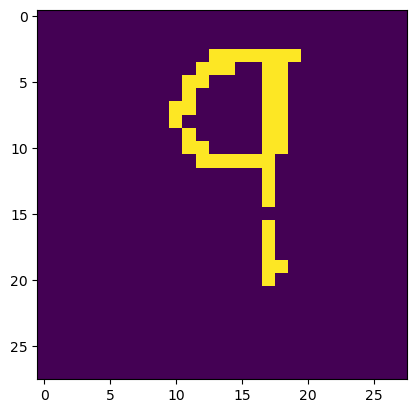

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx=979
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)


In [19]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)

In [20]:
import joblib 
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

In [26]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy=",metrics.accuracy_score(prediction,test_y))

Accuracy= 0.7313432835820896


In [27]:
#prediction

In [29]:
import cv2
import joblib
import time
import numpy as np
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(400,350,800,800))
    img.save(images_folder+"img.png")
    im=cv2.imread(images_folder+"img.png")
    im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    img_gray=cv2.GaussianBlur(im_gray,(15,15),0)
    ret,im_th=cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY)
    roi=cv2.resize(im_th,(28,28),interpolation=cv2.INTER_AREA)
    X = roi.flatten() / 255.0   # normalized
    rows,cols=roi.shape
    X=[]
    for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                X.append(k)
    predictions=model.predict([X])
    print("Predictions:",predictions[0])
    cv2.putText(im,"Prediction is "+str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 8


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 4


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 4


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 0


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 7


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 1


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 4


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 2


C:\Users\Dhanyashree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predictions: 8


KeyboardInterrupt: 

In [2]:
!pip install tensorflow
import tensorflow as tf

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.8 MB 2.1 MB/s eta 0:02:38
   ---------------------------------------- 1.0/331.8 MB 1.9 MB/s eta 0:02:58
   ---------------------------------------- 1.6/331.8 MB 1.9 MB/s eta 0:02:58
   ---------------------------------------- 2.4/331.8 MB 2.3 MB/s eta 0:02:25
   ---------------------------------------- 2.9/331.8 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 3.4/331.8 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 3.9/331.8 MB 2.4 MB/s eta 0:02:16
    --------------------------------------- 5.0/331.8 MB 2.7 MB/s eta 0:02:02
    --------------------------------------- 5.5/331.8 MB 2.7 MB/s eta 0:02:02
    --------------------------------------- 6.0/331.8 MB 2.7 MB/s eta 0:02:02
    --------------------------------------- 6.6/331.8 MB 2.7 MB/s eta 0:02:03



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Dhanyashree\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Dhanyashree\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dhanyashree\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dhanyashree\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dhanyashree\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp

ImportError: cannot import name 'pywrap_tensorflow' from 'tensorflow.python' (C:\Users\Dhanyashree\anaconda3\Lib\site-packages\tensorflow\python\__init__.py)

In [3]:
!python --version


Python 3.11.7
